In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

In [71]:
def new_config(N):
  config = np.ones((N,N))
  for i in range(N):
    for j in range(N):
      if random.randint(0,2) == 0: config[i][j] = -1
  return config

def MMC(config, energy,N, t):

  flip_idx = [ random.randint(0,N), random.randint(0,N) ]
  spin = config[ flip_idx[0] ][ flip_idx[1] ]
  energy_prime = 0
  # print("E: ", energy)
  # print("idx",flip_idx,"spin: ",spin)
  # print(config)
  # if flip_idx[0] != 0 and flip_idx[0] != N-1 and flip_idx[0] != 0

  # periodic boudary conditions
  energy_prime = 2 * spin * ( config[ (flip_idx[0]+1)%N ][ flip_idx[1] ] + config[ flip_idx[0]-1 ][ flip_idx[1] ] +
                              config[ flip_idx[0] ][ (flip_idx[1]+1)%N ] + config[ flip_idx[0] ][ flip_idx[1]-1 ])

  if np.exp(-beta[t]*energy_prime) > random.uniform(0, 1):
    config[ flip_idx[0] ][ flip_idx[1] ] = -spin
    energy += energy_prime

  return config, energy

In [72]:
def main(N,N_sample):

  statistic_energy = np.zeros(time_step)
  statistic_specific_heat = np.zeros(time_step)
  statistic_magnetization = np.zeros(time_step)

  N_relax = int(N_sample/10)

  fig, axs = plt.subplots(5, 5, figsize=(10, 10))

  for t in range(time_step):
    #init
    if t == 0:
      config = new_config(N)
      energy = 0

      for i in range(N-1):
        for j in range(N):
          energy -= config[i][j] * config[i+1][j]
          energy -= config[j][i] * config[j][i+1]
    # plt.imshow(config)
    # plt.title("start")
    # plt.show()
      # print("init energy: ",energy/(N*N))

    for i in range(N_relax):
      config,energy = MMC(config,energy,N,t)
      if i%25 == 0:
        plt.imshow(config)
        plt.show()
    # print("relaxed energy: ", energy/(N*N))
    # sampling
    for i in range(N_sample):
      config,energy = MMC(config,energy,N,t)
      # print("sample energy: ",energy)
      statistic_energy[t] += energy
      statistic_specific_heat[t] += energy**2
      statistic_magnetization[t] += abs(np.sum(config))
    # plt.imshow(config)
    # plt.title("end")
    # plt.show()
    statistic_magnetization[t] /= N_sample
    statistic_energy[t] /= N_sample
    statistic_specific_heat[t] = ( (statistic_specific_heat[t]/N_sample) - (statistic_energy[t]**2) ) * (beta[t]**2)


  statistic_energy /= (N*N)
  statistic_specific_heat /= (N*N)
  statistic_magnetization /= (N*N)

  statistic_energy = np.flip(statistic_energy)
  statistic_specific_heat = np.flip(statistic_specific_heat)
  statistic_magnetization = np.flip(statistic_magnetization)

  return statistic_energy, statistic_specific_heat, statistic_magnetization

In [73]:
T = np.arange(0.2,4.1,0.2)
beta = np.flip(1/T)
time_step = np.shape(T)[0]
# stat_E_11, stat_C_11, stat_M_11 = main(N=10,N_sample=1000)

In [74]:
# stat_E_12, stat_C_12, stat_M_12 = main(N=10,N_sample=10000)
stat_E_21, stat_C_21, stat_M_21 = main(N=50,N_sample=1000)
# stat_E_22, stat_C_22, stat_M_22 = main(N=50,N_sample=10000)
# stat_E_31, stat_C_31, stat_M_31 = main(N=100,N_sample=1000)
# stat_E_32, stat_C_32, stat_M_32 = main(N=100,N_sample=10000)

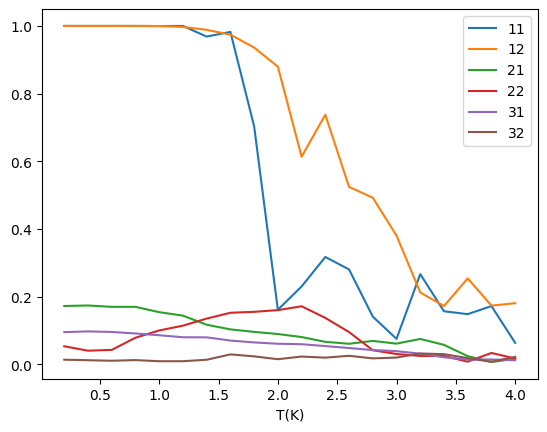

In [75]:
# plt.plot(T,stat_E_11,label='E_11')
# plt.plot(T,stat_E_12,label='E_12')
# plt.plot(T,stat_E_21,label='21')
# plt.plot(T,stat_E_22,label='22')
# plt.plot(T,stat_E_31,label='31')
# plt.plot(T,stat_E_32,label='32')
# plt.plot(beta,(N-1)/N * (beta/(np.cosh(beta)))**2,label='theroy_C')
# plt.plot(T,stat_C_11,label='11')
# plt.plot(T,stat_C_12,label='12')
# plt.plot(T,stat_C_21,label='21')
# plt.plot(T,stat_C_22,label='22')
# plt.plot(T,stat_C_31,label='31')
# plt.plot(T,stat_C_32,label='32')
plt.plot(T,stat_M_11,label='11')
plt.plot(T,stat_M_12,label='12')
plt.plot(T,stat_M_21,label='21')
plt.plot(T,stat_M_22,label='22')
plt.plot(T,stat_M_31,label='31')
plt.plot(T,stat_M_32,label='32')
# plt.ylim(0,0.2i)
plt.xlabel("T(K)")
plt.legend()
plt.show()